In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

dataset= pd.read_csv(r"C:\Users\Shubham Pandey\Downloads\Social_Network_Ads (1).csv")
dataset.head()

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


In [12]:
dataset["Purchased"].value_counts()

Purchased
0    257
1    143
Name: count, dtype: int64

In [13]:
x= dataset.iloc[:,:-1]
y= dataset["Purchased"]

In [14]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2 , random_state=42)
from sklearn.linear_model import LogisticRegression
lr= LogisticRegression()
lr.fit(x_train , y_train)

LogisticRegression()

In [15]:
lr.score(x_test, y_test)*100

88.75

In [ ]:
print(lr.predict([[19,19000]]))
print(lr.predict([[35,20000]]))
print(lr.predict([[32,150000]]))
print(lr.predict([[35,27000]])) #this prediction is basically true but if it show wrong predction then we use data balancing techniques 

[0]
[0]
[1]
[0]


c:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


data balancing technique



In [24]:
dataset["Purchased"].value_counts()

Purchased
0    257
1    143
Name: count, dtype: int64

In [27]:
x= dataset.iloc[:,:-1]
y= dataset["Purchased"]

In [ ]:
from imblearn.under_sampling import RandomUnderSampler
from imblearn.under_sampling import RandomOverSampler #similary over sampling is also used

ru = RandomUnderSampler()
ru.fit(x, y)

RandomUnderSampler()

In [ ]:
ru_x, ru_y=ru.fit_resample(x, y) #ru_x is the new x and ru_y is the new y

In [32]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(ru_x, ru_y, test_size=0.2 , random_state=42)

In [33]:
lr.fit(x_train , y_train)

LogisticRegression()

In [34]:
lr.score(x_test, y_test)*100

74.13793103448276

In [ ]:
lr.predict([[45,22000]]) #this accurecy is low but it prediction is more accurate than before

c:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([0], dtype=int64)

RECALL , PRECISION , F1-SCORE

In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

dataset1= pd.read_csv(r"C:\Users\Shubham Pandey\Downloads\placement (2).csv")
dataset1.head()



,cgpa,resume_score,placed
0,8.14,6.52,1
1,6.17,5.17,0
2,8.27,8.86,1
3,6.88,7.27,1
4,7.52,7.30,1


In [48]:
x= dataset1.iloc[:,:-1]
y= dataset1["placed"]

In [49]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2 , random_state=42)
from sklearn.linear_model import LogisticRegression
lr= LogisticRegression()    
lr.fit(x_train , y_train)


LogisticRegression()

In [51]:
lr.score(x_test, y_test)*100
lr.predict([[8.27,8.86]])

c:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([1], dtype=int64)

In [56]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score
cf= confusion_matrix(y_test, lr.predict(x_test))
print(cf)

[[10  0]
 [ 0 10]]


<Axes: >

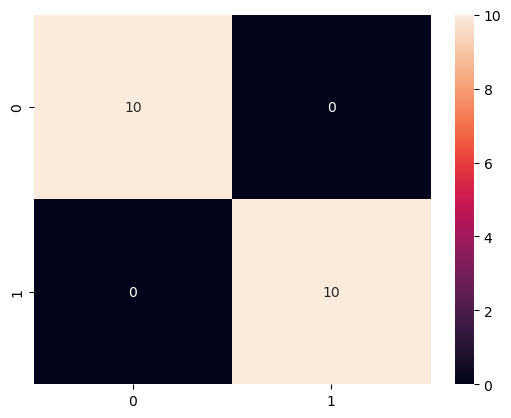

In [57]:
sns.heatmap(cf, annot=True)

In [60]:
print(precision_score(y_test, lr.predict(x_test))*100)
print(recall_score(y_test, lr.predict(x_test))*100)
print(f1_score(y_test, lr.predict(x_test))*100   )

100.0
100.0
100.0
